<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-the-future-selling-price-of-a-home?" data-toc-modified-id="What-is-the-future-selling-price-of-a-home?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is the future selling price of a home?</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Cleaning-and-Preparing-the-Data" data-toc-modified-id="Cleaning-and-Preparing-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning and Preparing the Data</a></span><ul class="toc-item"><li><span><a href="#SalePrice-Skewness" data-toc-modified-id="SalePrice-Skewness-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SalePrice Skewness</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Categorical-Features-Transformation" data-toc-modified-id="Categorical-Features-Transformation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Categorical Features Transformation</a></span></li><li><span><a href="#Remove-outliers" data-toc-modified-id="Remove-outliers-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove outliers</a></span></li></ul></li><li><span><a href="#Modeling-Approaches" data-toc-modified-id="Modeling-Approaches-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling Approaches</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#eXtreme-Gradient-Boost-Regressor" data-toc-modified-id="eXtreme-Gradient-Boost-Regressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>eXtreme Gradient Boost Regressor</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Elastic Net</a></span></li><li><span><a href="#Stacking-Regressors" data-toc-modified-id="Stacking-Regressors-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Stacking Regressors</a></span></li></ul></li></ul></div>


# What is the future selling price of a home?

<p>In this competition we are required to develop a full-fledged approach to make predictions about the future sale prices of homes.</p>

<p>We will begin this notebook with the usual import cell and by defining a couple of utility functions. Then we will read our dataset into pandas dataframes.</p>

In [2]:
# The below code is used to install external packages
import pip
def install(package):
    pip.main(['install', package])

In [3]:
%%capture
install('seaborn')

In [4]:
import os

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

import warnings

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
sns.set()
sns.set_color_codes()



base_dir = './challenge_data'

matplotlib.rc('figure', titlesize='24')
matplotlib.rc('legend', fontsize='medium')
matplotlib.rc('axes', titlesize='22', titleweight='bold')
matplotlib.rc('xtick', labelsize='18')
matplotlib.rc('ytick', labelsize='18')
matplotlib.rc('axes', labelsize='20')
matplotlib.rc('font', size='18')

In [5]:
trainDf = pd.read_csv(os.path.join(base_dir, 'train.csv'))
testDf = pd.read_csv(os.path.join(base_dir, 'test.csv'))

In [6]:
# We are joining both dataset and test set in order to 
# perform some data cleaning on both
testDf['SalePrice'] = np.nan
dataset = trainDf.append(testDf)

# Exploratory Analysis

<p>Before starting to dig into our dataset features, let's have a look at what kind of data it contains and at some statistics about them.</p>


In [7]:
dataset.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal   208500.0  
1      5   2007        WD         Normal   181500.0  
2      9   2008        WD         Normal   223500.0  

[3 rows x 81 columns]

As we can already see, there are missing values which we will have to deal with. We will focus on them at a later stage of our analysis.

In [8]:
print('The training set contains', len(trainDf), 'rows and',len(trainDf.columns), 'columns')
print('The test set contains', len(testDf), 'rows and',  len(testDf.columns), 'columns')

The training set contains 1200 rows and 81 columns
The test set contains 260 rows and 81 columns


<div class="alert alert-info">
<p>We were supposed to have one column less in the test set with respect to the training set. However, when we read them and we joined them together into the dataset variable, we added an additional <i>SalePrice</i> column (whose values were set to NA) to the training set, just to make its shape match those of the training set.</p>
</div>

In [9]:
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1200.000000  
mean   181414.628333  
std     81070.908544  
min     34900.000000  
25%    129900.000000  
50%    163700.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

<p>The <tt>Saleprice</tt> range of our houses goes from 34,900\$ to 755,000\$. This is quite a huge gap and it makes us believe that we may have very different houses in our datasets, ranging from small houses with few rooms to big villas with pool.</p>

<p>Next we will show some plots to help us visualize some insights about our dataset.</p>

<div class="alert alert-info">


<p>In the following figures most of the analysis have been performed on the whole dataset (train + test). However, when we wanted to show information releated to the <tt>SalePrice</tt> feature, we used just the training set for obvious reasons.</p>

</div>

<p>Let's have a look at the correlation between each feature.</p>

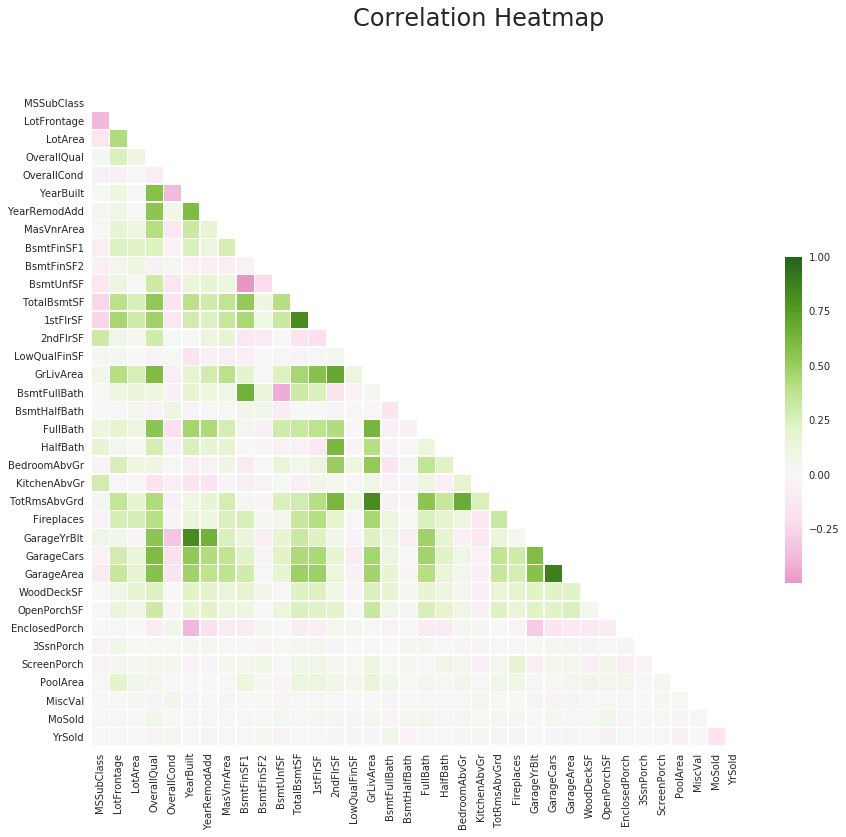

In [10]:
plt.figure(figsize=(15,12))
sns.set(style="white")

# Drop the Id and SalePrice features because it is irrelevant to our purpose
# We will take a look at SalePrice later
corr = dataset.drop(['Id', 'SalePrice'],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='PiYG', mask=mask, square=True,linewidths=.5, cbar_kws={"shrink": .5},center=0)
plt.suptitle('Correlation Heatmap')
plt.show()

<div class="alert alert-success">
From our plot we can see that the following feature pairs are strongly positively correlated:
<ul>
<li><tt>GarageCars</tt> and <tt>GarageArea</tt></li>
<li><tt>1stFlrSF</tt> (First Floor square feet) and <tt>TotalBsmtSF</tt> (Total square feet of basement area)</li>
<li><tt>YearBuilt</tt> and <tt>GarageYrBlt</tt></li>
<li><tt>TotRmsAbvGrd</tt> (Total rooms above grade) and <tt>GrLivArea</tt> (Above grade (ground) living area square feet)</li>
</ul>

By looking at the description of those features, it seems quite obvious the reason why they are highly correlated. This kind of information will be quite useful in the next steps of our analysis, especially in the case we will decide to perform some dimensionality reduction using e.g. the PCA methods.<br><br>

The following pairs, instead, are very negatively correlated:
<ul>
    <li><tt>BsmtUnfSF</tt> (Unfinished square feet of basement area) and <tt>BsmtFinSF1</tt> (finished square feet)</li>
    <li><tt>BsmtFullBath</tt> (Basement full bathrooms) and <tt>BsmtUnfSF</tt></li>
</ul>
 
Again the reason seems obvious. The unfinished square feet in the basement are negatively correlated with the finished square feet and with the number of full basement bathrooms.<br><br>
</div>



What could be very interesting to see at this point is the correlation between the <tt>SalePrice</tt> feature and all the other ones.

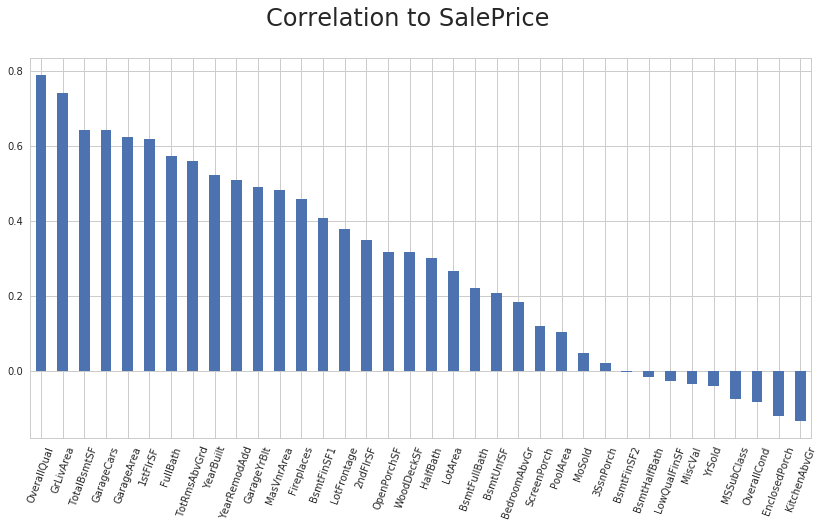

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

corr_with_SalePrice = trainDf.drop(["Id"], axis=1).corr()["SalePrice"].sort_values(ascending=False)

corr_with_SalePrice.drop("SalePrice").plot.bar(color='b')
plt.suptitle('Correlation to SalePrice')
plt.xticks(rotation=70)
plt.show()

<div class="alert alert-success">
We can notice that the <tt>OverallQual</tt> (overall material and finish rating of the house from 1 to 10) feature is the one which is more positively correlated to the <tt>SalePrice</tt>, together with the living area (<tt>GrLivArea</tt>) and the total basement area in square feet (<tt>TotalBsmtSF</tt>). <br>
Also <tt>GarageCars</tt> (size of garage in terms of car capacity) and <tt>GarageArea</tt> (size of garage in square feet) seem to be really positively correlated to the <tt>SalePrice</tt>.<br>

On the other hand there are some other features e.g. <tt>KitchenAbvGr</tt> (number of kitchens not in the basement) which makes <tt>SalePrice</tt> decrease.<br>
There are also some other attributes which are poorly correlated to the <tt>SalePrice</tt>.<br><br>
</div>

Let's now (re-)visualize the correlation matrix considering just the first 10 most correlated features found above.


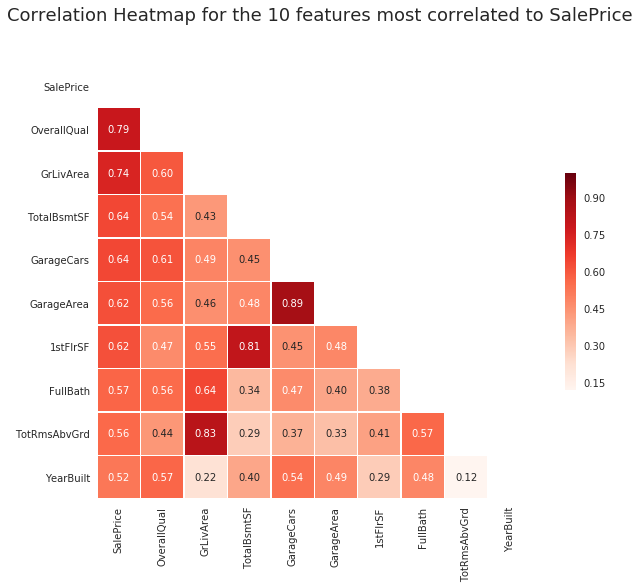

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_with_SalePrice.index[:k]
cm = np.corrcoef(trainDf[cols].values.T)

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,8))
hm = sns.heatmap(cm, cbar=True,linewidths=.5, cbar_kws={"shrink": .5}, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, mask=mask,cmap='Reds')

plt.suptitle('Correlation Heatmap for the 10 features most correlated to SalePrice',fontsize=18)
plt.show()

<div class="alert alert-success">
<p>The 3 most positively correlated feature pairs we mentioned above are still present in this correlation matrix (that is built just considering the top-10 features positively correlated to <tt>SalePrice</tt>).</p>

<p>It is interesting to notice how all these features are positively correlated one to another. <br>
It looks like all these criterias positively influence each other. <br>
Let's look for example the <tt>OveralQual</tt> column. All the other features have a correlation coefficient with it that is at least 0.44. Indeed, all the other features indicate some elements of the house (size, garage area, number of bathrooms and rooms and year of built) which, intuitively, are considered good index for the overall house quality.</p>
</div>

Now let's pick some of the most correlated features to perform a pairplot. In this way we can visualize the dependencies between them. Now we will avoid to consider pairs of highly correlated features such as <tt>GarageCars</tt> and <tt>GarageArea</tt>, <tt>TotalBsmtDF</tt> and <tt>1stFloorSF</tt>, and <tt>TotRmsAbvGrd</tt> and <tt>GrLivArea</tt>, so for each of these 3 pairs we will consider just one feature instead of both.

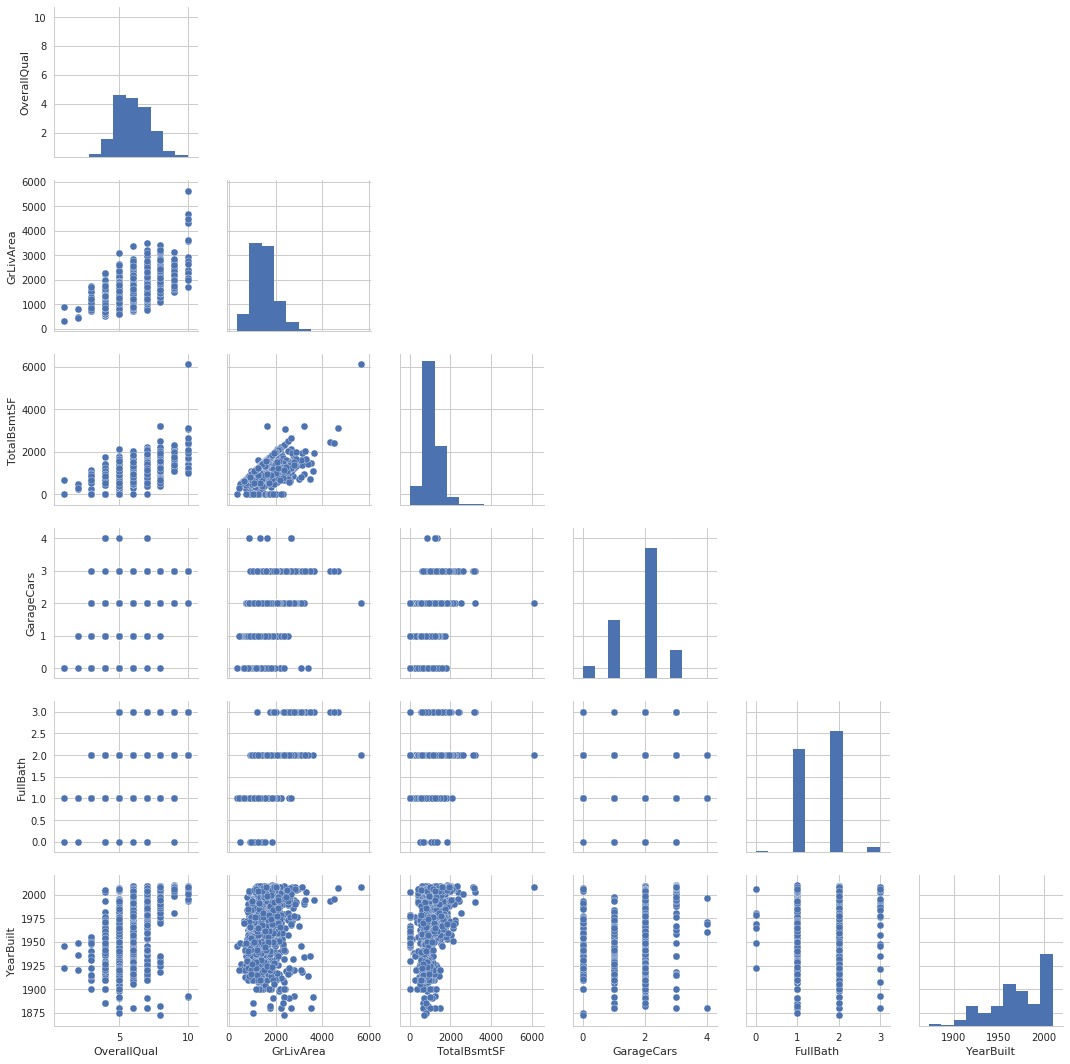

In [13]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
interesting_cols = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "FullBath", "YearBuilt"]
ax = sns.pairplot(dataset[interesting_cols], dropna=True)
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)
plt.show()

<div class="alert alert-success">
<p>We can notice a linear trend between <tt>GrLiveArea</tt> (Above Ground Living Area In Square Feets) and <tt>TotalBsmtSF</tt> (Total Square Feet Of Basement Area). Given the descriptions of the two features, it is quite obvious that the bigger is the above ground living area, the bigger is the basement. Surprisingly, those two features did not show a high correlation value when plotting the correlation matrix. </p>
</div>

<p>Now we try to plot <tt>SalePrice</tt> as a function of the six top correlated features using another pair plot.</p>


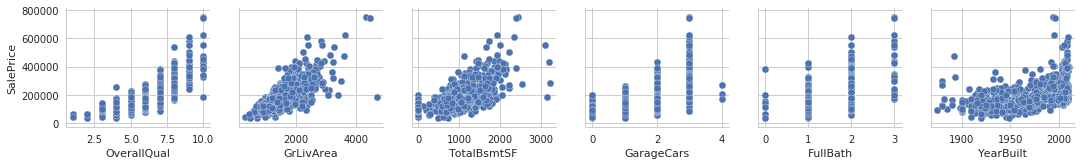

In [14]:
sns.pairplot(trainDf, x_vars=interesting_cols, y_vars='SalePrice')

<div class="alert alert-success">
<p>There is a "predictable" linear trend between <tt>SalePrice</tt> and all the other features we considered. Indeed, those features are those which mostly influence <tt>SalePrice</tt>. Considering what we observed above, we were expecting to obtain this kind of behaviour from this plot.</p>
</div>

<p>Our dataset contains several categorical features (those which are assigned with a value from a fixed non-numerical range). We now try to analyse them.</p>
<p>Firstly, let's see how each categorical feature is distributed in its range of values.</p>

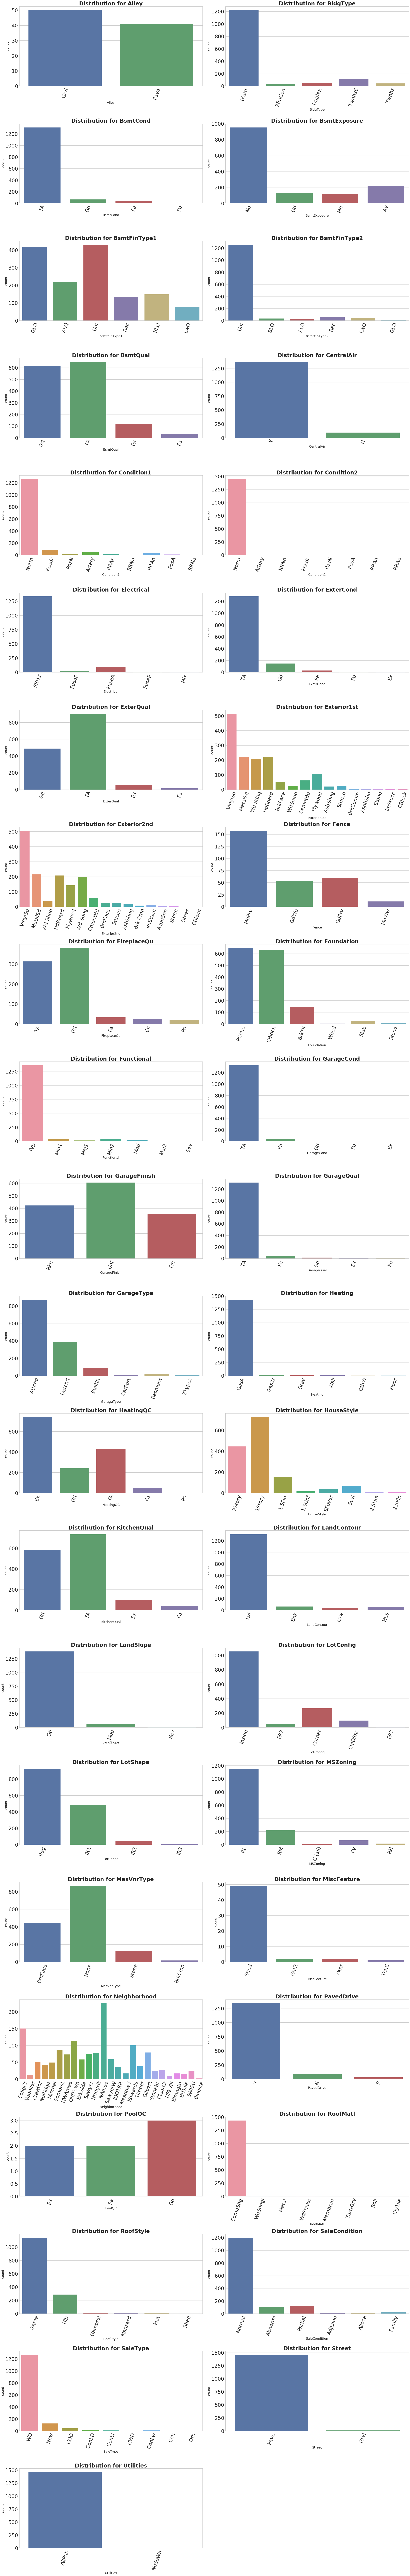

In [15]:
f, axarr = plt.subplots(22, 2, figsize=(32,200))

k = 0

feature_list = list(dataset.columns)
feature_list.sort()

for col in feature_list:
    if dataset[col].dtype == 'object':
        (i, j) = divmod(k, 2)
        axarr[i,j] = sns.countplot(col, data=dataset, ax=axarr[i,j])
        axarr[i,j].set_title('Distribution for {}'.format(col), fontsize=30)
        axarr[i,j].yaxis.set_tick_params(labelsize=28)
        axarr[i,j].xaxis.set_tick_params(labelsize=20)
        axarr[i,j].xaxis.label.set_size(18)
        axarr[i,j].yaxis.label.set_size(18)
        xticks = axarr[i,j].get_xticklabels()
        axarr[i,j].set_xticklabels(xticks, rotation=70,fontsize=28)
        k += 1
# Delete extra axes
f.delaxes(axarr[21, 1])
plt.tight_layout()

<div class="alert alert-success">
<p>
The majority of the categorical columns present a highly imbalanced distribution, i.e. the most of the values are part of a single category. This makes us believe that we may simplify those features to binary. 
As an example, let's consider the <tt>Heating</tt> feature. Most of the values are equal to <tt>GaSA</tt>. Therefore we may consider this feature values to be equal to one, if the original value is <tt>GaSA</tt>, or 0 otherwise. Anyway we will explore this type of data preprocessing in the respective section of this notebook.</p>
</div>

<p>Our dataset may contain several outliers.  Let's have a look at boxplots of each feature to figure this out.</p>


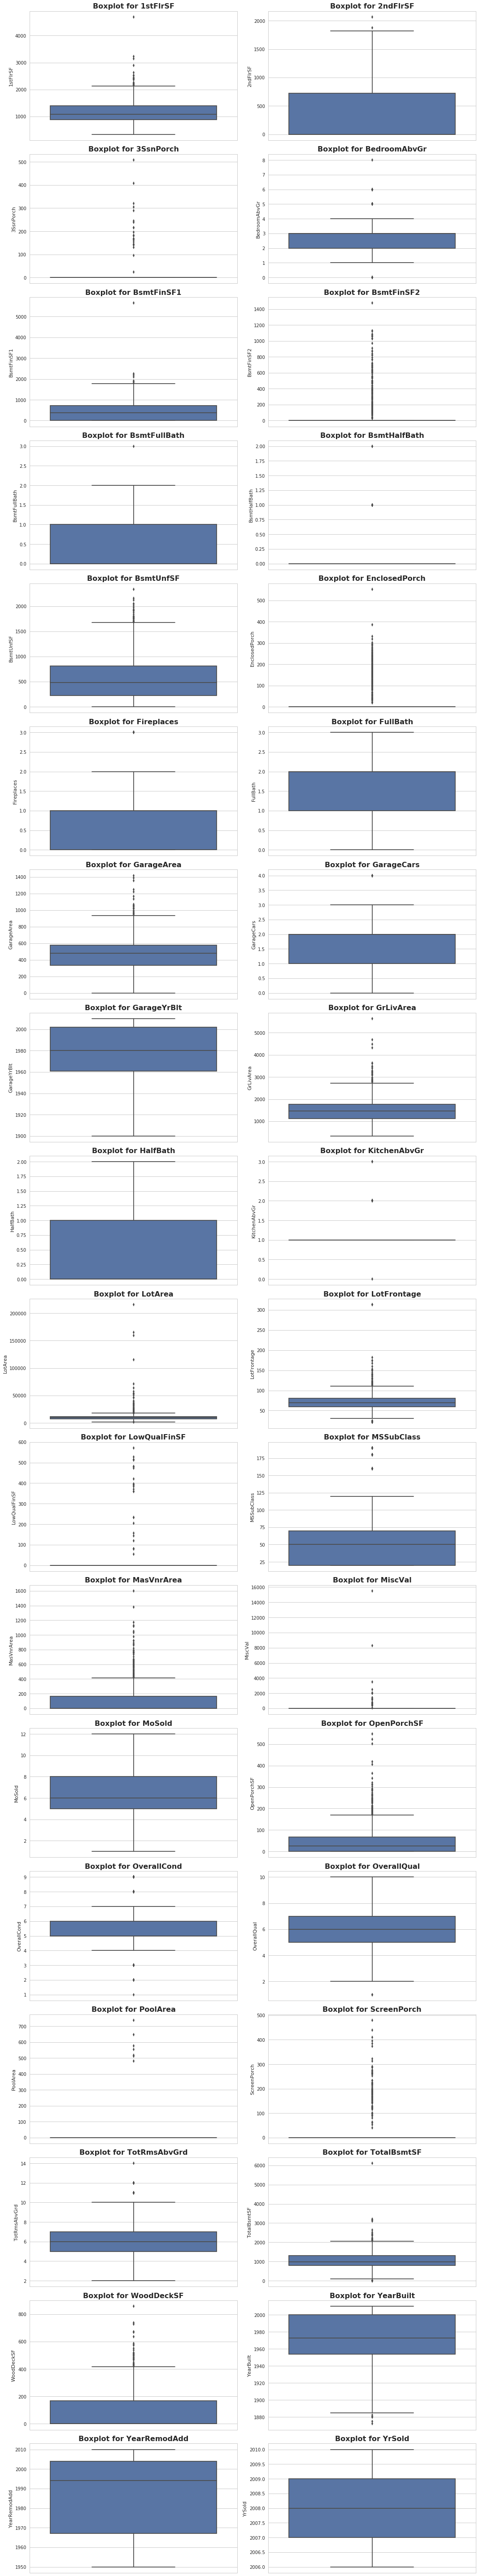

In [16]:
tmp_df = dataset.drop(['Id','SalePrice'],axis=1)

f, axarr = plt.subplots(18, 2, figsize=(15,80))

k = 0

feature_list = list(tmp_df.columns)
feature_list.sort()

for feature in feature_list:
    # We want to consider only non-categorical features
    if is_numeric_dtype(tmp_df[feature]):
        (i, j) = divmod(k, 2)
        axarr[i,j] = sns.boxplot(y=tmp_df[feature], ax=axarr[i,j])
        axarr[i,j].set_title('Boxplot for {}'.format(feature), fontsize=16, weight='bold')
        k += 1
plt.tight_layout()

<div class="alert alert-success">
It looks like the following features may have outliers:
<ul>
 <li><tt>3SsnPorch</tt> (Three season porch area in square feet)</li>
 <li><tt>BsmtFinSF2</tt> (Type 2 finished square feet)</li> 
 <li><tt>EnclosedPorch</tt> (Enclosed porch area in square feet)</li>
 <li><tt>GrLivArea</tt> (Above grade (ground) living area square feet)</li>
 <li><tt>LotFronage</tt> (Linear feet of street connected to property)</li>
 <li><tt>LotArea</tt> (Lot size in square feet)</li>
 <li><tt>LowQualFinSF</tt> (Low quality finished square feet (all floors))</li>
 <li><tt>MasVnrArea</tt> (Masonry veneer area in square feet)</li>
 <li><tt>MiscVal</tt> (Value of miscellaneous feature)</li>
 <li><tt>OpenPorchSF</tt> (Open porch area in square feet)</li>
 <li><tt>PoolArea</tt> (Pool area in square feet)</li>
 <li><tt>ScreenPorch</tt> (Screen porch area in square feet)</li>
 <li><tt>WoodDeckSF</tt> (Wood deck area in square feet)</li>
</ul>
 
However the boxplot analysis is not exahustive. In fact, for some features we can not rely too much on it. As an example, let's consider the <tt>PoolArea</tt> feature. It is quite normal that most of the values are very close to 0 (the majority of the houses do not have a pool) causing those houses having a pool to be seen as having an outlier value for that feature.</div>

<p>Up to now we always worked with the whole dataset (train + test). We will now start working with just the training set as we want to find some useful insights about the <tt>SalePrice</tt> feature.</p>

<p>First of all, let's see how the <tt>SalePrice</tt> values are distributed.</p>

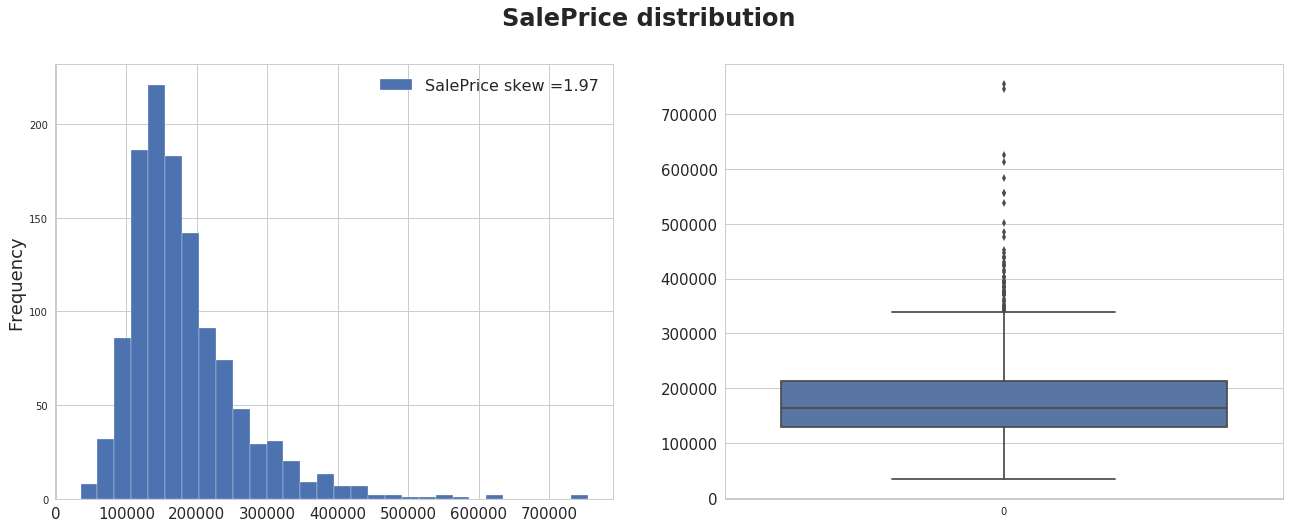

In [17]:
f, axarr = plt.subplots(1, 2, figsize=(22, 8))

skewness = trainDf['SalePrice'].skew()
trainDf['SalePrice'].plot.hist(edgecolor='white', bins=30, 
                                label='SalePrice skew =' + str(round(skewness,2)), ax=axarr[0])
axarr[0].legend(fontsize=16)
axarr[0].set_ylabel('Frequency',fontsize=18)

axarr[1] = sns.boxplot(data=trainDf['SalePrice'], ax=axarr[1])

plt.suptitle("SalePrice distribution", fontsize=24, weight='bold')
axarr[0].xaxis.set_tick_params(labelsize=15)
axarr[1].yaxis.set_tick_params(labelsize=15)

plt.show()

<div class="alert alert-success">
As we can see, the <tt>SalePrice</tt> feature is quite skewed and it seems to follow a sort of log normal distribution. In order to make <tt>SalePrice</tt> less skewed, we could apply a log transformation to it. However, we will do it in the next section, when we will discuss about data cleaning and missing values.
</div>

<p>Now we will plot <tt>SalePrice</tt> against each numerical feature we have. Along with this, for each plot, we will also show a linear regression model which was fit on the plotted data. In this way we will be able to see which features cause the biggest increase in the <tt>SalePrice</tt>.</p>


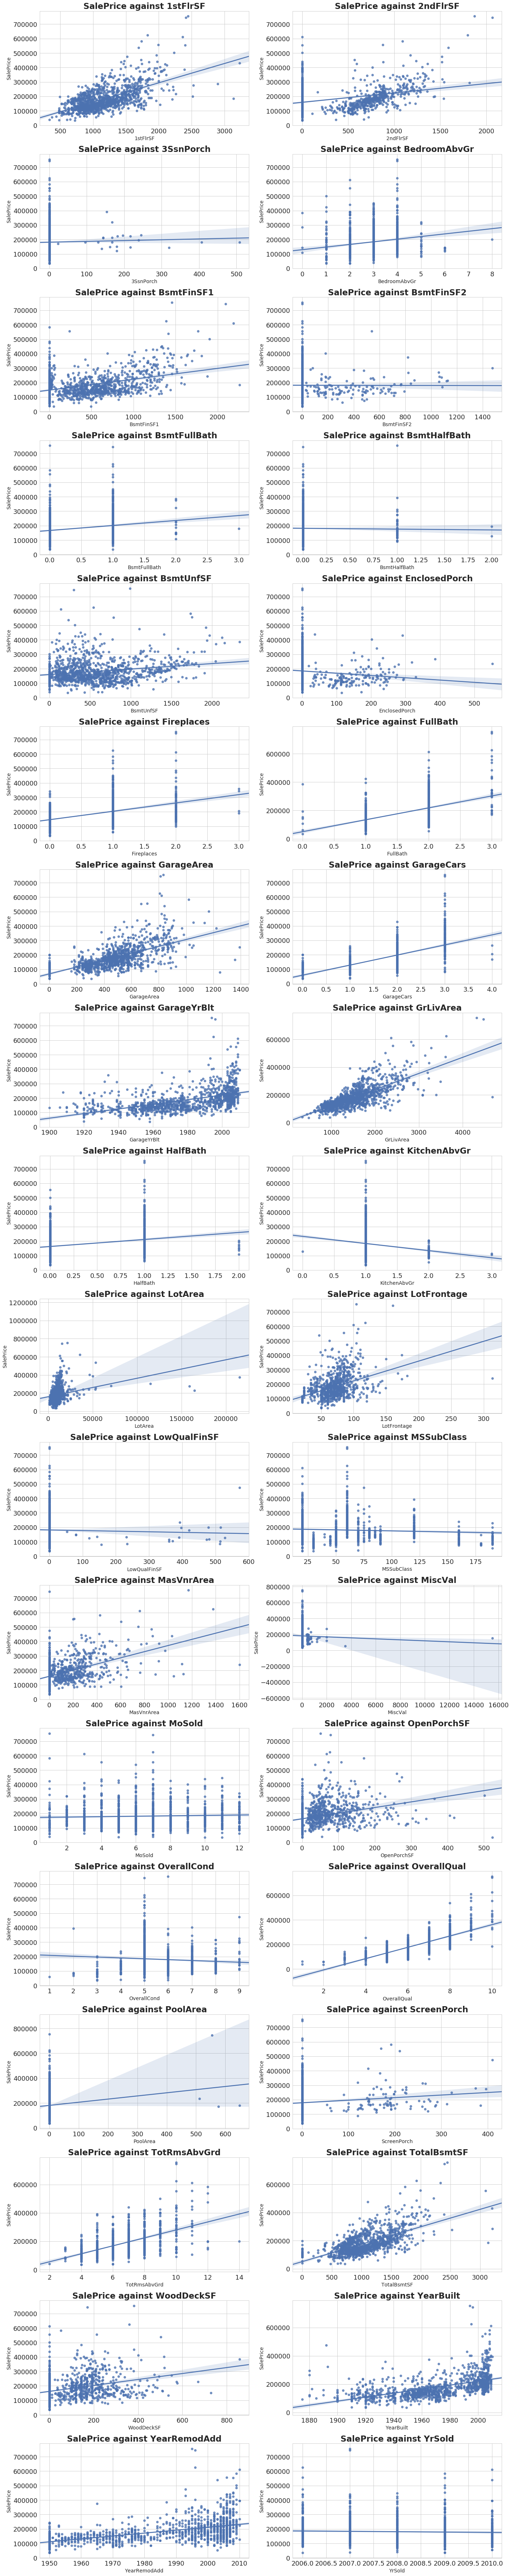

In [18]:
tmp_df = trainDf.drop(['Id'],axis=1)

f, axarr = plt.subplots(18, 2, figsize=(20,100))

k = 0
feature_list = list(tmp_df.columns)
feature_list.sort()

for feature in feature_list:
    # I want to consider only non-categorical features
    if feature != 'SalePrice' and is_numeric_dtype(tmp_df[feature]):
        (i, j) = divmod(k, 2)
        axarr[i,j] = sns.regplot(x=feature,  y='SalePrice', data=tmp_df, ax=axarr[i,j], color='b')
        axarr[i,j].set_title('SalePrice against {}'.format(feature), fontsize=23, weight='bold')
        axarr[i,j].yaxis.set_tick_params(labelsize=18)
        axarr[i,j].xaxis.set_tick_params(labelsize=18)
        axarr[i,j].xaxis.label.set_size(14)
        axarr[i,j].yaxis.label.set_size(14)
        k += 1
plt.tight_layout()

<div class="alert alert-success">
<p>As we can see, <tt>OverAllQual</tt>, <tt>1stFlrSF</tt>, <tt>TotalBsmtSF</tt> (correlated to <tt>1stFlrSF</tt>), <tt>GarageArea</tt>, <tt>GarageCars</tt> (correlated to <tt>GarageArea</tt>), <tt>TotRmsAbvGrd</tt>, <tt>GrLivArea</tt> (correlated to <tt>TotRmsAbvGrd</tt>), and <tt>FullBath</tt> have a clear linearly increasing relationship with <tt>SalePrice</tt>, meaning that an increase in one of them will likely lead to an increase in <tt>SalePrice</tt>.</p>

<p>There are also other features which seem to have a linearly increasing relationship with <tt>SalePrice</tt>, even though it is not that evident. For example, as <tt>YearBlt</tt> increases, <tt>SalePrice</tt> slowly increase. However this observation is not valid because, as we can see from the plot, there are several "old" houses which are much more expensive than some modern houses.</p>
</div>

<p>Let's now have a look at the boxplot of <tt>SalePrice</tt> for fixed categorical attribute values and see if we can get some useful insights from it.</p>

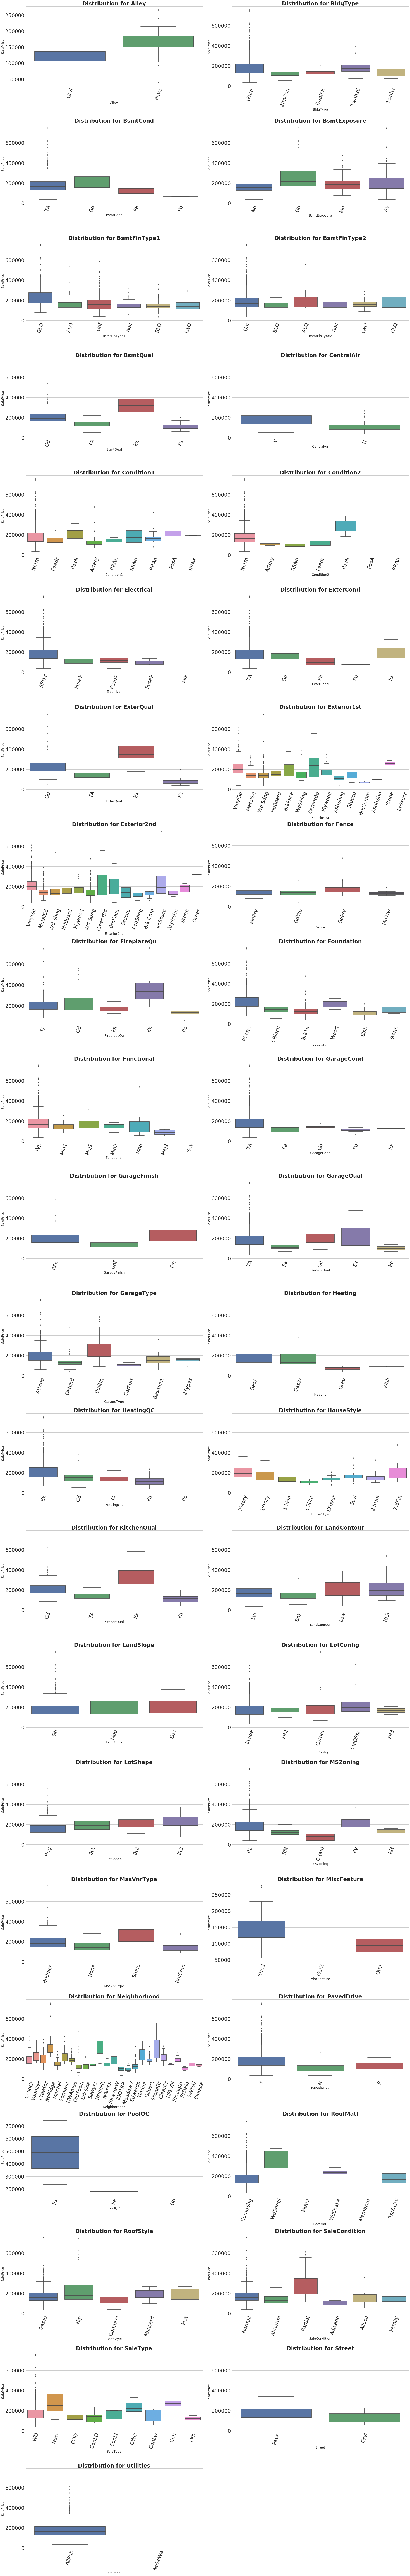

In [19]:
tmp_df = trainDf.drop(['Id'],axis=1)

f, axarr = plt.subplots(22, 2, figsize=(32,200))

k = 0
feature_list = list(tmp_df.columns)
feature_list.sort()
for col in feature_list:
    if col != 'SalePrice' and tmp_df[col].dtype == 'object':
        (i, j) = divmod(k, 2)
        axarr[i,j] = sns.boxplot(data=tmp_df, x=col, y='SalePrice', ax=axarr[i,j])
        axarr[i,j].set_title('Distribution for {}'.format(col), fontsize=30)
        axarr[i,j].yaxis.set_tick_params(labelsize=28)
        axarr[i,j].xaxis.set_tick_params(labelsize=20)
        axarr[i,j].xaxis.label.set_size(18)
        axarr[i,j].yaxis.label.set_size(18)
        xticks = axarr[i,j].get_xticklabels()
        axarr[i,j].set_xticklabels(xticks, rotation=70,fontsize=28)
        k += 1
# Delete extra axes
f.delaxes(axarr[21, 1])
plt.tight_layout()

<div class="alert alert-success">
<p>As we said, we are plotting the <tt>SalePrice</tt> distribution against the different categories for each categorical feature. For example, for <tt>MSZoning</tt> (the general zoning classification of the sale) the category with the highest average <tt>SalePrice</tt> is FV (Floating Village Residential), while the one with the lowest average <tt>SalePrice</tt> is C (Commercial).</p>

<p>The <tt>Alley</tt> feature, instead, has higher <tt>SalePrice</tt> for the <tt>Paved</tt> category and lower ones for the <tt>Gravel</tt> one.</p>

<p><tt>LandSlope</tt> (the slope of the property) has a more uniform distribution for all the categories (Gentle, modere and severe slope).</p>

<p>From the <tt>Neighborhood</tt> distribution we can notice that the <tt>SalePrice</tt> strongly depends on the zone.</p>

<p>We can also notice that the <tt>SalePrice</tt> is proportional to the basement quality (<tt>BsmtQual</tt>), indeed the Excellent quality has much higher average sale prices. </p>

<p>Most of those observations confirms many intuitive ideas we had about house prices e.g. the better the neighborhood the higher the price.</p>
</div>

# Cleaning and Preparing the Data
<div class="alert alert-info">
Before starting to go into the details of data cleaning and preprocessing we must state one thing. What we wrote in this section is the result of dozens of trials, most of whose were not reported for the sake of brevity.
</div>

## SalePrice Skewness

The first data cleaning operation we do is reducing the skewness of the <tt>SalePrice</tt> feature as we explained above, when we plotted its distribution. Firstly, we will apply a log transformation to the mentioned feature and then we will see if its skewness has improved.

In [15]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

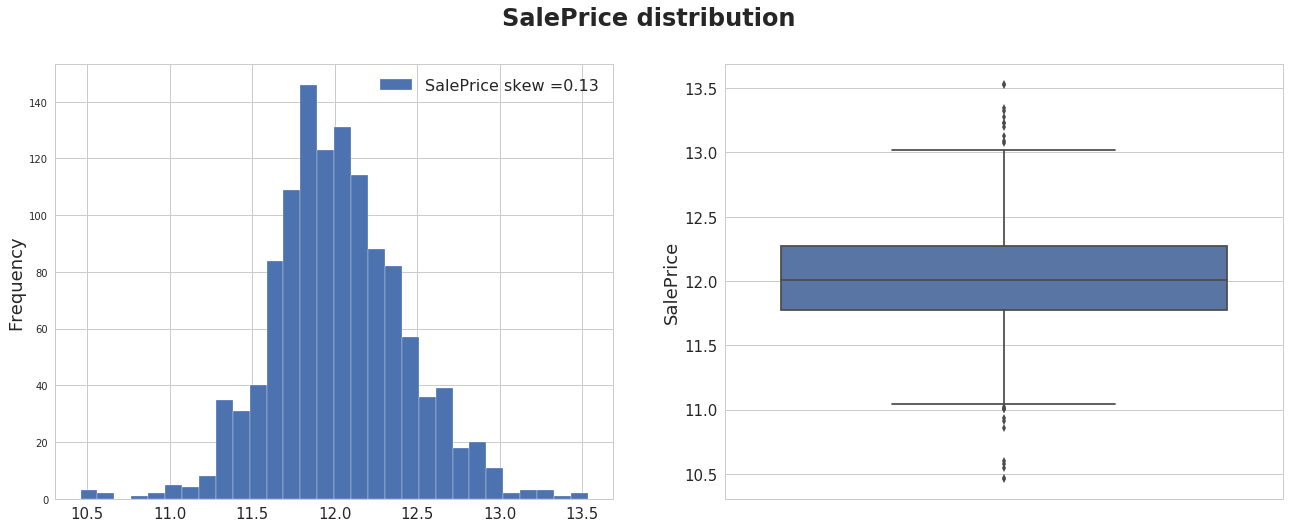

In [16]:
f, axarr = plt.subplots(1, 2, figsize=(22, 8))
skewness = dataset['SalePrice'].skew()
dataset['SalePrice'].plot.hist(edgecolor='white', bins=30, 
                                label='SalePrice skew =' + str(round(skewness,2)), ax=axarr[0])
axarr[0].legend(fontsize=16)
axarr[0].set_ylabel('Frequency',fontsize=18)

axarr[1] = sns.boxplot(y='SalePrice', data=dataset, ax=axarr[1])
axarr[1].set_ylabel('SalePrice',fontsize=18)

plt.suptitle("SalePrice distribution", fontsize=24, weight='bold')
axarr[0].xaxis.set_tick_params(labelsize=15)
axarr[1].yaxis.set_tick_params(labelsize=15)
plt.show()

<div class="alert alert-success">
<p>Apparently we achieved our goal of making <tt>SalePrice</tt> less skewed.<br>
The effect of using a log transformation is the following:
<ul>
<li>the lower SalePrices are further to each other</li>
<li>the higher SalePrices are closer to each other</li>
</ul>
We think this is a good transformation for the house prices, since while buying a house the difference between 110.000 \$ and 120.000\$ is considered higher than the difference between 1.110.000\$ and 1.120.000\$.</p>
</div>

## Missing Values
Now let's visualize our missing values on the whole dataset.

In [17]:
def compute_missing_values(dataset):
    tmp_df = dataset.drop(['SalePrice'], axis=1)
    total = tmp_df.isnull().sum().sort_values(ascending=False)
    percent = (tmp_df.isnull().sum()/tmp_df.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
    return missing_data[missing_data['Percentage'] > 0]

In [18]:
missing_data = compute_missing_values(dataset)
missing_data

Total  Percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageCond       81    5.547945
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
BsmtExposure     38    2.602740
BsmtFinType2     38    2.602740
BsmtCond         37    2.534247
BsmtQual         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
MasVnrType        8    0.547945
Electrical        1    0.068493

There are four features for which most of the values are missing:
<ul>
<li><tt>PoolQC</tt> which represent the pool quality;</li>
<li><tt>MiscFeature</tt> which represents miscellaneous features not covered in other categories such as elevator, second garage and so no;</li>
<li><tt>Alley</tt> which is the type of alley access to property;</li>
<li><tt>Fence</tt> which represents the quality of the fence.</li>
</ul>
This has to be taken into account at later stages of our analysis.<br>
For now, just let's provide graphical support to our missing values analysis.

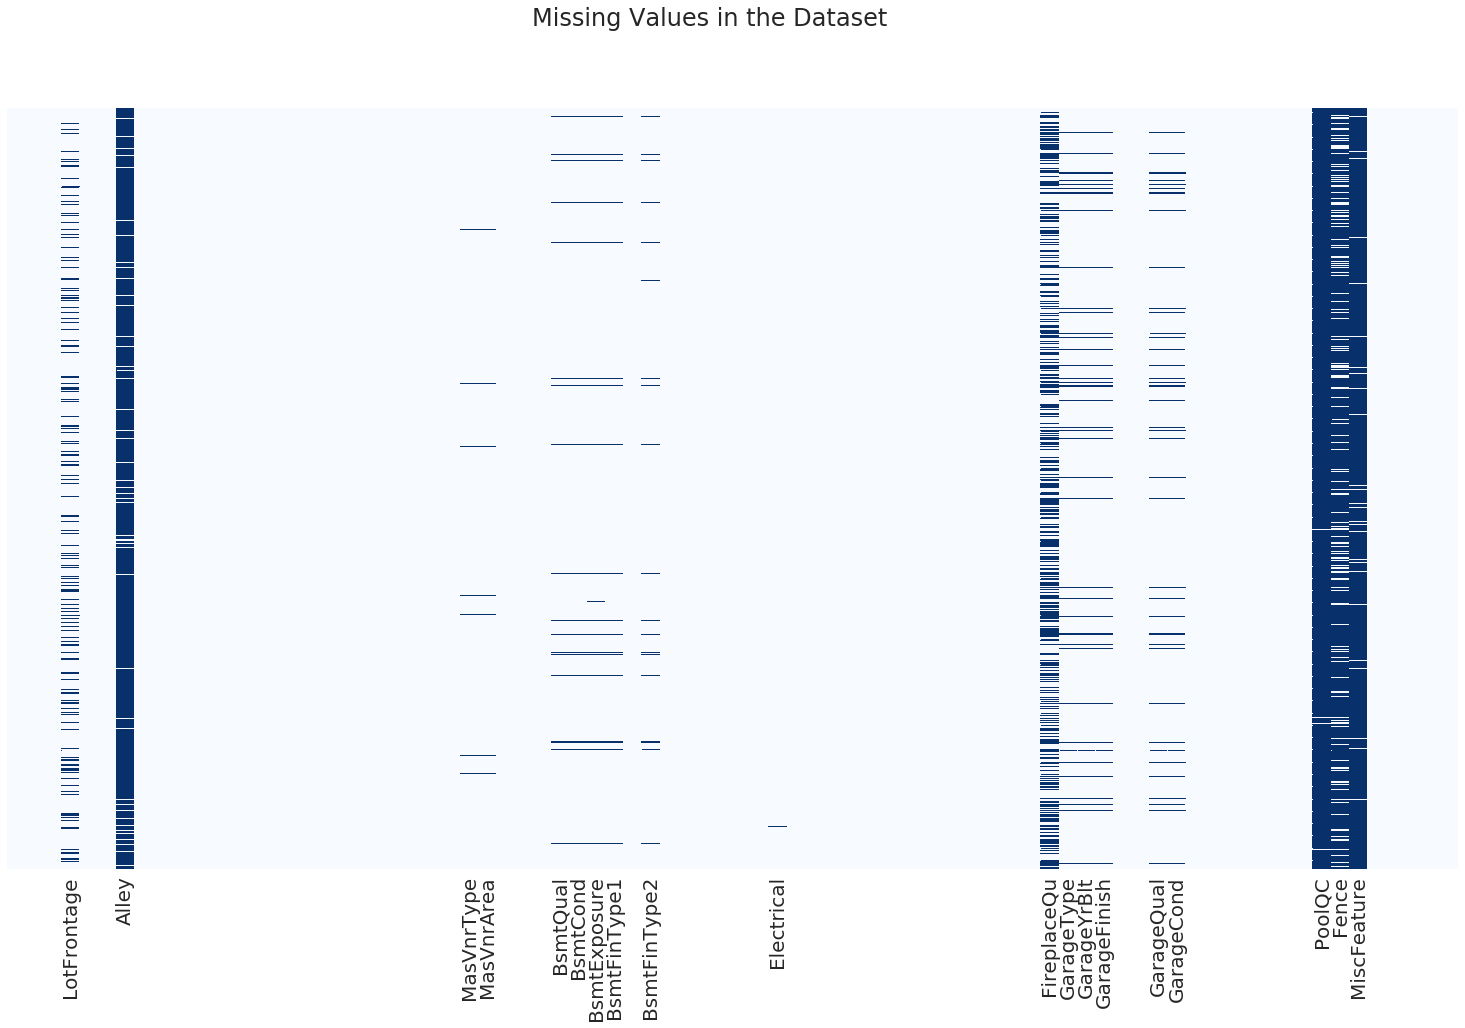

In [19]:
label_nas = []
tmp_df = dataset.drop(['SalePrice'], axis=1)
for col in tmp_df.columns.tolist():
    if np.sum(tmp_df[col].isnull()) != 0:
        label_nas.append(col)
    else:
        label_nas.append("")
plt.figure(figsize=(26,14))
plt.suptitle('Missing Values in the Dataset')
ax = sns.heatmap(tmp_df.isnull(), yticklabels=False, xticklabels=label_nas, cbar = False, cmap='Blues')
ax.xaxis.set_tick_params(labelsize=20)
plt.show()

<div class="alert alert-success">
<p>In the above plot each blue line represents a missing value for the given feature. Indeed, we can see how the <tt>Alley</tt>, <tt>PoolQC</tt>, <tt>Fence</tt> and <tt>MiscFeature</tt> columns are mostly blue.</p>

<p>By reading the features documentation provided with the text of this notebook, we discovered some interesting information about our features with the most missing values. In fact, we found out that the NA values (missing value) for <tt>Alley</tt>, <tt>PoolQC</tt>, <tt>MiscFeature</tt> and <tt>Fence</tt> have some specific meaning. In particular, if <tt>Alley</tt> is set to NA we know that the corresponding house has no alley access, if <tt>PoolQC</tt> is NA the house does not have a pool, if </tt>MiscFeature</tt> is NA there are no additional features for the house and, if <tt>Fence</tt> is NA, the house does not have a fence at all.</p>

<p>An interesting thing we can notice is that some attributes have the same amount of missing values.<br>
As an example, let's consider all the garage releated features (<tt>GarageCond</tt>, <tt>GarageType</tt>, <tt>GarageYrBlt</tt>, <tt>GarageFinish</tt> and <tt>GarageQual</tt>). We can see that all of them have the same amount of missing values (81). The features documentation clearly states that, for categorical attributes like <tt>GarageFinish</tt> and <tt>GarageType</tt>, the fact that a value is missing means that there is no garage. Therefore we believe that there should be some rows, corresponding to the houses without a garage, where all the garage features are missing. Let's verify this hypotesis by performing some queries on our dataset.</p>
</div>

In [20]:
no_garage_df = dataset[dataset['GarageFinish'].isnull()][['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']]
no_garage_df.describe(include='all')

GarageCond  GarageType  GarageYrBlt  GarageFinish  GarageQual
count          0.0         0.0          0.0           0.0         0.0
unique         0.0         0.0          NaN           0.0         0.0
mean           NaN         NaN          NaN           NaN         NaN
std            NaN         NaN          NaN           NaN         NaN
min            NaN         NaN          NaN           NaN         NaN
25%            NaN         NaN          NaN           NaN         NaN
50%            NaN         NaN          NaN           NaN         NaN
75%            NaN         NaN          NaN           NaN         NaN
max            NaN         NaN          NaN           NaN         NaN

<p>Above we basically queried those rows where <tt>GarageFinish</tt> was missing and then we selected all the garage releated feature. From the description of the obtained dataset we can see that our hypotesis about missing values was confirmed.</p>

<p>A similar reasoning can be applied to masonry veneer releated features (<tt>MasVnrArea</tt> and <tt>MasVnrType</tt>), which all have the same amount of missing values (8). Now we will perform the same operations we did on garage releated attributes but on masonry veneer features.</p>

In [21]:
no_msnr_df = dataset[dataset['MasVnrType'].isnull()][['MasVnrArea', 'MasVnrType']]
no_msnr_df.describe(include='all')

MasVnrArea  MasVnrType
count          0.0         0.0
unique         NaN         0.0
mean           NaN         NaN
std            NaN         NaN
min            NaN         NaN
25%            NaN         NaN
50%            NaN         NaN
75%            NaN         NaN
max            NaN         NaN

<p>Again, our intuition was confirmed.</p>

<p>By looking at basement releated features having missing values, we can see that some of them (<tt>BsmtExposure</tt> and <tt>BsmtFinType2</tt>) have 38 missing values, while, some others (<tt>BsmtCond</tt>, <tt>BsmtQual</tt> and <tt>BsmtFinType1</tt>) have 37 missing values. This is quite weird.</p>

Let's see what are the rows having the additional <tt>BsmtExposure</tt> and <tt>BsmtFinType2</tt> missing values.

In [22]:
no_bsmt_df = dataset[dataset['BsmtExposure'].isnull()][
    ['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']
]
no_bsmt_df[no_bsmt_df['BsmtCond'].notnull()]

BsmtExposure BsmtFinType2 BsmtCond BsmtQual BsmtFinType1
948          NaN          Unf       TA       Gd          Unf

In [23]:
no_bsmt_df = dataset[dataset['BsmtFinType2'].isnull()][
    ['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']
]
no_bsmt_df[no_bsmt_df['BsmtCond'].notnull()]

BsmtExposure BsmtFinType2 BsmtCond BsmtQual BsmtFinType1
332           No          NaN       TA       Gd          GLQ

<div class="alert alert-success">
<p>As we can notice, <tt>BsmtExposure</tt> and <tt>BsmtFinType2</tt> have their additional missing value in two different rows, in which none of the other basement releated features have missing values. However, we believe that this is not going to be a problem because of the strategy we applied when transforming categorical features (as explained below in more details). In fact, as we will transform categorical features into dummy features, the two additional missing values for <tt>BsmtExposure</tt> and <tt>BsmtFinType2</tt> will contain 0 in all the generated dummy features, not representing any particular problem for the next analysis.</p>
</div>

<p>We tried to deal with missing values one by one in different ways, taking into account the extensive documentation we have about each of our features. Anyway, in the end we reached the best results by using the <tt>get_dummies</tt> function on our dataset's dataframe. This funcion turns each categorical feature into a set of boolean features. As an example, let's consider a categorical feature called <tt>MY_FEATURE</tt> which may have one of two values: <tt>X</tt> and <tt>Y</tt>. By applying this transformation we will drop the <tt>MY_FEATURE</tt> column and we will add two new columns <tt>X</tt> and <tt>Y</tt> which may either have 0 or 1 as values. This transformation automatically deals with missing values. In fact, in case of missing value, all the newly added column values will be set to 0.</p>


## Categorical Features Transformation
<p>Now we will turn categorical data into numerical features. As we mentioned before, we tried different approaches to transform categorical features: 
<ul>
<li>LabelEncoder: assignes a unique integer for each value in a category</li>
<li>One hot encoder: creates dummy variables for each categorical column as explained above</li>
<li>Mixed approach: LabelEncoder for the ordinal categorical features,i.e, the ones who have a logical order (e.g. <tt>ExterQual</tt>, <tt>ExterCond</tt>, etc.), while one hot encoder for the other ones (e.g. <tt>Neighborhood</tt>, <tt>Heating</tt>,etc.)</li>
</ul>
However, in the end we reached the best results using one hot encoder for every categorical feature (both ordinal and not).</p>

<p>Let's apply this transformation.</p>

In [25]:
def turn_dummy(df, prop):
    dummies = pd.get_dummies(df[prop], prefix=prop)
    df.drop(prop, axis=1, inplace=True)
    return pd.concat([df, dummies], axis=1)

for col in dataset.columns.tolist():
    if dataset[col].dtype == 'object':
        dataset = turn_dummy(dataset, col)

In [26]:
dataset.head(5)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1          ...            \
0          2003       196.0         706          ...             
1          1976         0.0         978          ...             
2          2002       162.0         486          ...             
3          1970         0.0         216          ...             
4          2000       350.0         655          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 290 columns]

Now we should have solved most of our problems with missing values. Let's verify if this is true.

In [27]:
missing_data = compute_missing_values(dataset)
missing_data

Total  Percentage
LotFrontage    259   17.739726
GarageYrBlt     81    5.547945
MasVnrArea       8    0.547945

<div class="alert alert-success">
<p>It looks like we still have some missing values (indeed <tt>LotFrontage</tt>, <tt>GarabgeYrBlt</tt> and <tt>MasVnrArea</tt> are continuous variables).</p>
</div>

<p>As we have seen earlier, <tt>GarageYrBlt</tt> and <tt>MasVnrArea</tt> are missing when there is no garage and no masonry veneer respectively. Therefore we believe that we can simply fill both features with 0s.</p>

<p>Regarding <tt>LotFrontage</tt> (which is the linear feet of street connected to property) we believe that replacing each missing value with 0 should be fine enough. We also tried some different approaches, in which we replaced <tt>LotFrontage</tt> missing values with the mean of that feature but our model performances decreased.</p>

Let's apply what I described above.


In [28]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(0)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [29]:
dataset.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1          ...            \
0          2003       196.0         706          ...             
1          1976         0.0         978          ...             
2          2002       162.0         486          ...             
3          1970         0.0         216          ...             
4          2000       350.0         655          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 290 columns]

Now we should have fixed any issue with missing values. If so, the below function should return an empty dataframe. Let's verify that.

In [30]:
compute_missing_values(dataset)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

<div class="alert alert-info">
Perfect. Now, since we do not have any other missing value, we can now start dealing with outliers.
</div>

## Remove outliers
<p>We will define a <tt>plot_distribution</tt> function which we will use to plot <tt>SalePrice</tt> against some numerical feature in order to detect eventual outliers.</p>

<p>Of course we could have removed the outliers for every feature, but we empirically realized that the outlier removal leads us to better result just for the <tt>GrLivArea</tt>, the <tt>TotalBsmtSF</tt> and the <tt>GarageCars</tt> features.</p>

<p>Before starting let's split our dataset again into training and test set in order to have our data structures ready for the analysis. We are doing this because we want to remove outliers only from the training set.</p>

In [31]:
train = dataset[:len(trainDf)].copy()
test = dataset[-len(testDf):].copy()

In [32]:
n_rows = len(train)
print('Number of elements before removing outliers:', n_rows)

Number of elements before removing outliers: 1200


<p>Let's now plot the distribution of the features we are analyzing to get a better understanding of which points may be our outliers.</p>

In [33]:
features_with_outliers = ['GrLivArea', 'TotalBsmtSF', 'GarageCars']

In [36]:
def plot_distribution(df, x_attr, y_attr='SalePrice'):
    x = df[x_attr].as_matrix()
    y = df[y_attr].as_matrix()
    fig, ax = plt.subplots()
    ax.set_xlabel(x_attr)
    ax.set_ylabel(y_attr)
    ax.set_title('{} against {}'.format(y_attr, x_attr))
    ax.scatter(x, y)    

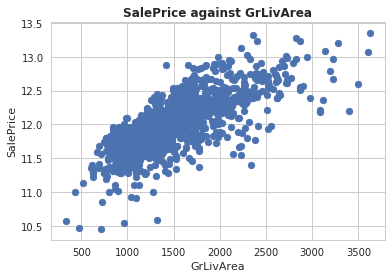

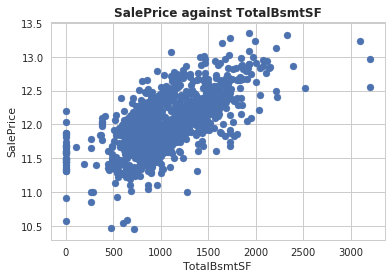

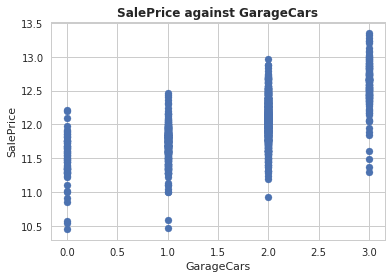

In [37]:
for f in features_with_outliers:
    plot_distribution(train, f)

<div class="alert alert-info">
From the above plot we defined the following threshold values for our features from which we want to remove outliers:
<ul>
    <li><tt>TotalBsmtSF</tt>: 3500</li>
    <li><tt>GrLivArea</tt>: 4000</li>
    <li><tt>GarageCars</tt>: 4</li>
</ul>
</div>



<p>Let's remove our outliers then and let's plot again the distribution of our cleaned features.</p>

In [38]:
# Removing some outliers
train = train[train.TotalBsmtSF < 3500]
train = train[train.GrLivArea < 4000]
train = train[train.GarageCars < 4]

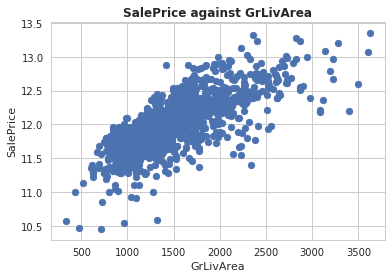

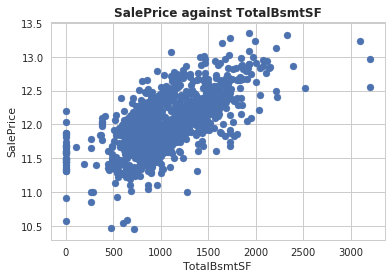

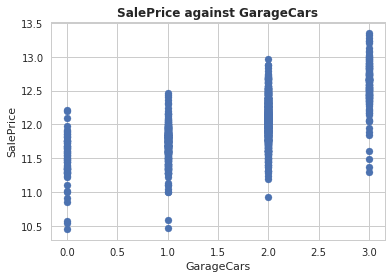

In [39]:
for f in features_with_outliers:
    plot_distribution(train, f)

In [40]:
print('Number of outliers removed:', n_rows - len(train))

Number of outliers removed: 6


As we can see from those new plots all our outliers were removed. Now that we are done with data cleaning and preprocessing, let's turn our dataframes into vectors which will be used in the modeling section of this notebook.

In [41]:
X_train = train.drop(['SalePrice'], axis=1).as_matrix()
X_test = test.drop(['SalePrice'], axis=1).as_matrix()
y = train['SalePrice'].as_matrix()

print(X_train.shape, X_test.shape, y.shape)

(1194, 289) (260, 289) (1194,)


<div class="alert alert-info">
Now we have everything ready to start trying some regressor models.
</div>

# Modeling Approaches
<p>In this section we will analyze several machine learning models using different techniques. Each model's performance will be evaluated by using cross validation and RMSE (Root Mean Squared Error).</p>

## Linear Regression
<p>The first, and most obvious, approach we will use is linear regression. Of course we do not have high expectations on the outcome of this model but we will still give it a try, just to get a better understanding of the problem.</p>

In [42]:
def evaluate_linear_regression(x, y, cv=10):
    """
    Evaluates RMSE using a cross-validation schema
    """
    clf = LinearRegression()
    result = cross_val_score(clf, x, y, cv=cv, scoring='neg_mean_squared_error')
    # We need to do the abs of the MSE mean because it was sklearn's developers
    # design choice to make it negative
    mean_rmse = np.sqrt(abs(result.mean())) 
    print('Mean MSE after cross-validation on {} folds: {}'.format(cv, round(mean_rmse,5)))
    return mean_rmse

In [43]:
lr_rmse = evaluate_linear_regression(X_train, y)

Mean MSE after cross-validation on 10 folds: 0.13426


In [44]:
performances = []
performances.append(lr_rmse)

<div class="alert alert-success">
<p>We do not obtained really bad performances even if our linear regressor is a really simple model. However based on our previos observation about feature correlation we believe that by performing dimensionality reduction we may improve/obtain the same results.</p>
</div>
<p>
What we will do now will be to exploit the observations we made while analyzing the correlation matrix among our features. Just as a recall, we noted that we have high correlation between the following pairs of features:
<ul>
<li><tt>GarageCars</tt> and <tt>GarageArea</tt></li>
<li><tt>1stFlrSF</tt>(First Floor square feet) and <tt>TotalBsmtSF</tt>(Total square feet of basement area)</li>
<li><tt>YearBuilt</tt> and <tt>GarageYrBlt</tt></li>
<li><tt>TotRmsAbvGrd</tt> (Total rooms above grade) and <tt>GrLivArea</tt>(Above grade (ground) living area square feet)</li>
</ul>
So, if our intuition was correct, if we remove one feature per pair, we should be able to obtain more or less the same results as above. Let's first verify if this is correct.</p>


In [45]:
# Drop unwanted features
X_train_low_corr = train.drop(['SalePrice', 'GarageCars', '1stFlrSF', 'YearBuilt', 'TotRmsAbvGrd'], axis=1).as_matrix()
X_test_low_corr = test.drop(['SalePrice', 'GarageCars', '1stFlrSF', 'YearBuilt', 'TotRmsAbvGrd'], axis=1).as_matrix()

In [46]:
evaluate_linear_regression(X_train_low_corr, y)

Mean MSE after cross-validation on 10 folds: 0.13431


0.13430580393111186

In [51]:
linear_regr = LinearRegression()
linear_regr.fit(X_train_low_corr, y)
real_evaluate(linear_regr.predict(X_test_low_corr))

0.22166637088717736


<div class="alert alert-success">
<p>As we predicted, we obtained an error which is comparable to one obtained earlier. Despite the fact that we did not have any improvement, we may consider the new set of features as a starting point for our subsequent analysis. In fact, now we will perform some dimensionality reduction.</p>
</div>

<p>We will use Principal Component Analysis (PCA) to perform our dimensionality reduction. To better understand how many components we should consider, we should firstly evaluate the explained variation for each component. The [explained variation](https://en.wikipedia.org/wiki/Explained_variation) measures the proportion to which our reduced mathematical model accounts for the variation of our original data.</p>


In [52]:
def find_best_n_components(n_components_start, X):
    explained_variation = list()
    for n in range(n_components_start, X.shape[1]):
        pca = PCA(n_components=n)
        pca.fit(X)
        explained_variation.append(np.sum(pca.explained_variance_ratio_))
    return explained_variation

In [53]:
continuous_features = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
X_pca_train = train[continuous_features]
X_pca_test = test[continuous_features]
minMax = MinMaxScaler()
X_pca_train_scaled = minMax.fit_transform(X_pca_train)
X_pca_test_scaled = minMax.transform(X_pca_test)
print(X_pca_train_scaled.shape)

(1194, 37)


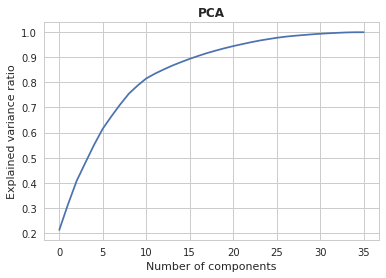

In [54]:
explained_variation = find_best_n_components(1, X_pca_train_scaled)
plt.title('PCA')
plt.plot(range(len(explained_variation)), explained_variation)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

<div class="alert alert-success">
Given the obtained explained variation values, we believe that considering just 15 components could be enough to obtain a good model which is quite representative of the original dataset. Indeed, with 15 components, we should be able to approximately account for the 90 % of the total variation in our data.
</div>

In [55]:
# Perform PCA with n components on our dataset
n = 15
pca = PCA(n_components=n)
X_pca_train = pca.fit_transform(X_pca_train_scaled)
X_pca_test = pca.transform(X_pca_test_scaled)
print(X_pca_train.shape)
tot_variance = np.sum(pca.explained_variance_ratio_)
print('The total explained variance using',n,'components is', round(tot_variance,2))

(1194, 15)
The total explained variance using 15 components is 0.88


Let's evaluate our linear regression again using the reduced dataset.

In [56]:
evaluate_linear_regression(X_pca_train, y)

Mean MSE after cross-validation on 10 folds: 0.1507


0.15070041572068169

In [57]:
linear_regr = LinearRegression()
linear_regr.fit(X_pca_train, y)
real_evaluate(linear_regr.predict(X_pca_test))

0.22288295159882382


<div class="alert alert-success">
<p>Again it seems that our intuitions were correct and, even if we had a small decrease in performances, the outcome of this model is still comparable to the ones obtained above.</p>
</div>

<p>This result goes far beyond our expectations and it is quite encouraging. Indeed it makes us believe that, by using more complex algorithms, we could achieve even better results.</p>

<p>However we do not believe that we should trust this result too much because of the high simplicity of the model we used. In fact, it is very unlickely that a simple straight line could be able to solve our problem in such a good way. The fact that we are obtain so good results may be due to the fact that we oversimplified our model.</p>

<p>In the next few section we will focus on more complex model which should work better.</p>

## eXtreme Gradient Boost Regressor

<p>XGBoost stands for eXtreme Gradient Boosting.</p>
<p>It is an implementation of gradient boosted decision trees designed for speed and performance.<br>
Boosting is an ensemble technique where new models are added to correct the errors made by existing models.<br>
In this approach new models are created to predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.</p>

<p>This approach supports both regression and classification predictive modeling problems.</p>

<p>In this model we have the following parameters: 
<ol>
    <li><b>learning_rate</b></li>
    <li><b>min_child_weight</b> defines the minimum sum of weights of all observations required in a child</li>
    <li><b>max_depth</b> the maximum depth of a tree</li>
    <li><b>gamma</b> a node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split</li>
    <li><b>colsample_bytree</b> denotes the fraction of columns to be randomly samples for each tree</li>
    <li><b>subsample</b> denotes the fraction of observations to be randomly samples for each tree</li>
</ol>
References:<br>
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/<br>
https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
</p>

<p>
In order to estimate parameters for our xgboost regressor we will use <a href='https://en.wikipedia.org/wiki/Bayesian_optimization'>Bayesian Optimization</a>. Bayesian Optimization tries to minimize the objective function (RMSE in our case) by sampling some input-outputs (5 in our case) and use them to guess the true function with a <a href='https://en.wikipedia.org/wiki/Gaussian_process'>Gaussian Process</a>. Then use that guessed function to determine where to evaluate next. 
</p>

<p>
We decided to use Bayesian Optimization for tuning xgboost Regressor because it has a lot of parameters and it was not easy to guess them by trial and error or by using simpler methods e.g. grid search.    
</p>

In [50]:
%%capture
install('xgboost')
install('bayesian-optimization')

In [51]:
import xgboost
from sklearn.metrics import mean_squared_error

In [52]:
def xgb_evaluate(learning_rate,
                 min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma):
    
    params = {
        'n_estimators': 2000,
        'learning_rate': learning_rate,
        'max_depth': int(max_depth),
        'min_child_weight': min_child_weight,
        'colsample_bytree': colsample_bytree,
        'subsample': subsample,
        'gamma': gamma,
        'objective':'reg:linear',
        'eval_metric': 'rmse'
    }
    res = xgboost.cv(params, xgb_data, nfold=10, metrics='rmse')
    return -res['test-rmse-mean'].iloc[-1]

In [57]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split

X_train_gb = X_train
xgb_data = xgboost.DMatrix(X_train_gb, y)

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_train_gb, y, test_size = 0.2, random_state = 0)

xgbBO = BayesianOptimization(xgb_evaluate, {'learning_rate': (0.4, 0.5),
                                            'min_child_weight': (6, 11),
                                            'colsample_bytree': (0.9, 1.0),
                                            'max_depth': (5, 10),
                                            'subsample': (0.9, 1.0),
                                            'gamma': (0, 0.01)
                                            })

with warnings.catch_warnings():
    # Suppress warnings
    warnings.simplefilter("ignore")
    # Perform bayesian optimization
    xgbBO.maximize(init_points=10, n_iter=25, acq='ei')

Initialization
---------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   learning_rate |   max_depth |   min_child_weight |   subsample | 
    1 | 01m56s |   -0.15647 |             0.9300 |    0.0079 |          0.4415 |      8.0472 |             9.3663 |      0.9819 | 
    2 | 01m28s |   -0.16696 |             0.9966 |    0.0076 |          0.4102 |      6.6503 |             9.5849 |      0.9268 | 
    3 | 01m32s |   -0.16313 |             0.9706 |    0.0076 |          0.4213 |      6.8209 |             7.1584 |      0.9484 | 
    4 | 01m27s |   -0.15549 |             0.9086 |    0.0074 |          0.4955 |      5.6524 |             9.7375 |      0.9134 | 
    5 | 01m01s |   -0.15522 |             0.9019 |    0.0033 |          0.4558 |      5.4871 |            10.5044 |      0.9469 | 
    6 | 01m14s |   -0.16940 |             0.9346 |    0.0013 |       

<p>The output of the above cell is the output of the Bayesian Optimization we performed. Each line corresponds to an iteration of the optimization process and contains the 'Value' we are optimizing which, in our case, is the RMSE value when doing cross validation with 10 folds. Along with the RMSE value also the parameters which lead to that value are shown.</p>

<p>Above the optimized value appears to be negative simply because the library we used does not provide a "minimize" function. Therefore we had to maximize the opposite of the RMSE to actually minimize it.
</p>

In [58]:
print('Minimum XGBOOST RMSE value: %f' % abs(xgbBO.res['max']['max_val']))
print('Best XGBOOST parameters: ', xgbBO.res['max']['max_params'])

Minimum XGBOOST RMSE value: 0.146185
Best XGBOOST parameters:  {'max_depth': 9.386578952962994, 'subsample': 1.0, 'colsample_bytree': 1.0, 'learning_rate': 0.5, 'min_child_weight': 11.0, 'gamma': 0.01}


In [59]:
performances.append(xgbBO.res['max']['max_val'])

## Lasso

<p>The LASSO (Least Absolute Shrinkage and Selection Operator) is a regression method that involves penalizing the absolute size of the regression coefficients.</p>

<p>By penalizing (or equivalently constraining the sum of the absolute values of the estimates) you end up in a situation where some of the parameter estimates may be exactly zero. The larger the penalty applied, the further estimates are shrunk towards zero.</p>

<p>This is convenient when we want some automatic feature/variable selection, or when dealing with highly correlated predictors, where standard regression will usually have regression coefficients that are 'too large'.</p>

<p>
In order to evaluate the performances of the Lasso model built, we used cross validation. In particular we used scikit-learn's implementation of the grid search optimization technique in order to find the best parameters for our model. Grid search functioning is quite easy: it just tries to find the best combination of parameters among the given possible values for each of them. At each iteration, the grid search algorithm evaluate the given parameters by doing cross validation (with 10 folds in our case).
</p>

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {
    'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.003, 0.01],
    'warm_start': [True, False],
    'selection': ['cyclic', 'random'],
    'fit_intercept': [True, False]
}

lasso = Lasso()

grid_search = GridSearchCV(estimator = lasso,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           verbose=False)
with warnings.catch_warnings():
    # Suppress warnings
    warnings.simplefilter("ignore")
    # Perform grid search
    grid_search = grid_search.fit(X_train, y)
    best_parameters = grid_search.best_params_
    best_mse = grid_search.best_score_
    best_lasso = grid_search.best_estimator_
    print('Best RMSE:', np.sqrt(abs(best_mse)))
    print('Best parameters', best_parameters)
    performances.append(np.sqrt(abs(best_mse)))

Best RMSE: 0.11395232937452746
Best parameters {'warm_start': False, 'alpha': 0.0005, 'selection': 'random', 'fit_intercept': True}


## Ridge

<p>This regression method is pretty similar to Lasso. The main difference is the regularization technique.<br>
While Lasso uses a L1 regularization, Ridge uses a L2 one.</p>

<p>The result is that L2 regularization drives many of your parameters down, but will not necessarily eradicate them, since the penalty disappears near zero. Contrarily, L1 regularization forces non-essential entries of weigths all the way to zero.</p>

<p>Again, we used grid search to perform both cross validation and model parameters estimation.</p>

In [63]:
from sklearn.linear_model import Ridge

In [64]:
parameters = {
    'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.003, 0.01],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'fit_intercept': [True, False]
}

ridge = Ridge()

grid_search = GridSearchCV(estimator = ridge,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           verbose=0)
with warnings.catch_warnings():
    # Suppress warnings
    warnings.simplefilter("ignore")
    # Perform grid search
    grid_search = grid_search.fit(X_train, y)
    best_parameters = grid_search.best_params_
    best_mse = grid_search.best_score_
    best_ridge = grid_search.best_estimator_
    print('Best RMSE:', np.sqrt(abs(best_mse)))
    print('Best parameters', best_parameters)
    performances.append(np.sqrt(abs(best_mse)))

Best RMSE: 0.1332043254792173
Best parameters {'solver': 'svd', 'alpha': 0.01, 'fit_intercept': True}


## Elastic Net
<p>Elastic Net is a compromise between Lasso and Ridge, i.e. a linear regression using both L1 and L2 regularizations.</p>

<p>The `l1_ratio` mixing parameter, with 0 <= l1_ratio <= 1, allows to combine L1 and L2 regularization. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.</p>

<p>Performances are evaluated by using grid search with cross validation with 10 folds.</p>

In [65]:
from sklearn.linear_model import ElasticNet

In [66]:
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'l1_ratio': [0, 0.3, 0.5, 0.8, 1],
    'selection': ['cyclic', 'random'],
    'fit_intercept': [True, False]
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(estimator = elastic_net,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           verbose=0)
with warnings.catch_warnings():
    # Suppress warnings
    warnings.simplefilter("ignore")
    # Perform grid search
    grid_search = grid_search.fit(X_train, y)
    best_parameters = grid_search.best_params_
    best_mse = grid_search.best_score_
    best_elastic_net = grid_search.best_estimator_
    print('Best RMSE:', np.sqrt(abs(best_mse)))
    print('Best parameters', best_parameters)
    performances.append(np.sqrt(abs(best_mse)))

Best RMSE: 0.1141211354919278
Best parameters {'l1_ratio': 0.5, 'alpha': 0.001, 'selection': 'random', 'fit_intercept': True}


## Stacking Regressors
<p>Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs of the individual regression models in the ensemble.<br>
References: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/</p>

<p>
Now we will try to use a Stacking Regressor model in which we will combine all the models we previously built. What we expect is an increase in terms of performances. The performances of this model are again evaluated using cross validation with 10 folds.
</p>

<p>
Here we made an additional tuning step in which we slightly changed the hyper parameters of our models manually to achieve better results. Therefore it is likely that the model we put into the StackingRegressor may not be completely the same as those we have seen above.
</p>

In [68]:
%%capture
install('mlxtend')

In [70]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[
                              
                               xgboost.XGBRegressor(n_estimators = 1000,
                                   learning_rate = 0.0388,
                                   max_depth = 8,
                                   min_child_weight = 13,
                                   colsample_bytree =  1 ,
                                   subsample = 1,
                                   gamma = 0.1205),
                               
                                GradientBoostingRegressor(
                                                                n_estimators = 15,
                                                                max_depth = 2
                                                            ),
                               
                               Ridge(alpha=4.85, fit_intercept=False, solver='auto'),
                               Lasso(alpha=0.5,fit_intercept=True, selection='random', warm_start=False),
                               
                               ElasticNet(max_iter=1e+5, alpha=0.001, fit_intercept=True, l1_ratio=0.1, selection='random'),
                               
                                
                           ], 
                           meta_regressor=svr_rbf)

In [71]:
result = cross_val_score(stregr, X_train, y, cv=10, scoring='neg_mean_squared_error')
# We need to do the abs of the MSE mean because it was sklearn's developers
# design choice to make it negative
mean_rmse = np.sqrt(abs(result.mean())) 
print('RMSE after cross-validation on 10 folds: {}'.format(mean_rmse))
performances.append(mean_rmse)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


RMSE after cross-validation on 10 folds: 0.11499934042833027


<p>Stacking Regressor is the most powerful model we used so far and we were expecting performances improvements with it. Therefore we believe that it would be our choice for generating our final results.</p>

<p>
While working on this notebook we also tried to add some other regressors (AdaBoostRegressor, RandomForestRegressor, KernelRidge and BayesianRidge) to our ensable stacking regressor model but we did not get performance improvements. In some cases, instead, we obtained worse results with more regressors. Therefore we tried to keep our model configuration as simple as possible while obtaining the best results possible.
</p>

# Performance Comparisons

Let's have a look at the individual performances of each of the classifier we built. The performances we will take into account are those obtained when doing cross validation.

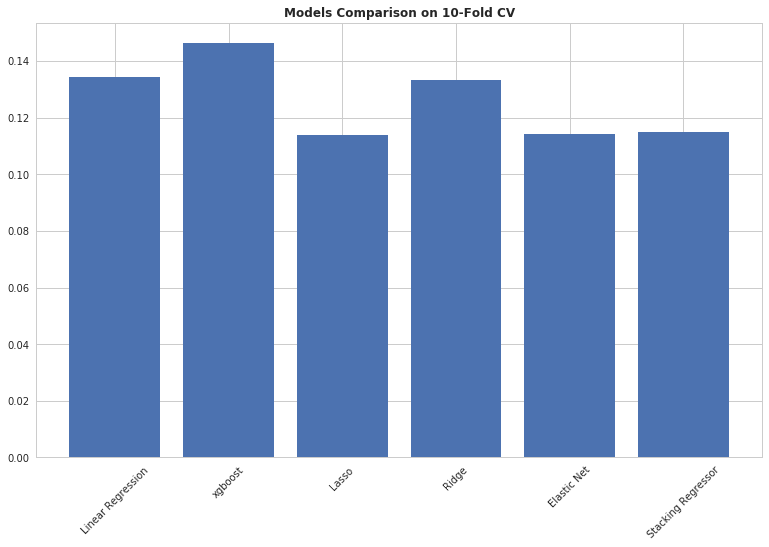

In [76]:
xlabels = ['Linear Regression', 'xgboost', 'Lasso', 'Ridge', 'Elastic Net', 'Stacking Regressor']

plt.figure(figsize=(13,8))
plt.bar(np.arange(len(xlabels)), np.abs(performances))
plt.title('Models Comparison on 10-Fold CV')
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=45)
plt.show()

Our models have more or less the same performances while doing cross validation. The one with the best one is the Lasso regressor with the xgboost regressor being the worse. Anyway, the difference between Lasso and Stacking Regressor is minimal and, in the end, we decided to use the Stacking Regressor for producing our final output as we believe that it should produce more stable and reliable predictions in on real world data.

# Output Generation

In this section we are just generating the output file for the submission. Since the best results we obtained were those in which we used the Stacking Regressor, we will use this classifier to generate our output.

In [78]:
stregr.fit(X_train, y)
y_pred = stregr.predict(X_test)

In [79]:
df = testDf.copy()
df['SalePrice'] = np.exp(y_pred)
df = df[['Id', 'SalePrice']]

In [80]:
df.to_csv('aml4_challenge_results.csv', index=False)

In [82]:
print(df[:5])

     Id      SalePrice
0  1201  102511.693669
1  1202  193243.659537
2  1203  130709.282198
3  1204  201712.562068
4  1205  150047.429104
